In [1]:
from matplotlib import pyplot as plt
import numpy as np

from synet.networks.random import random_two_split_network
from synet.config import measures

In [2]:
np.random.seed(1872631)
n_events = 5000
max_dt = 200
n_sample = 5
n_agents = 100
inter_event_step = 10

In [3]:
%%time
temp_inter_event = np.arange(0, n_events+1, inter_event_step)
all_inter_event = np.zeros(len(temp_inter_event)*n_sample, dtype=int)
for i in range(n_sample):
    all_inter_event[i::n_sample] = temp_inter_event

networks = [random_two_split_network(n_events, n_inter_events, n_agents) for n_inter_events in all_inter_event]

CPU times: user 4min 50s, sys: 0 ns, total: 4min 50s
Wall time: 4min 51s


In [4]:
%%time

all_results = {}

for meas_name, measure_class in measures.items():
    meas = measure_class()
    entropies = meas.entropy_dt(networks, max_dt, n_jobs=32)
    all_results[meas_name] = np.array([np.mean(e) for e in entropies])

CPU times: user 4.02 s, sys: 7.23 s, total: 11.2 s
Wall time: 8min 7s


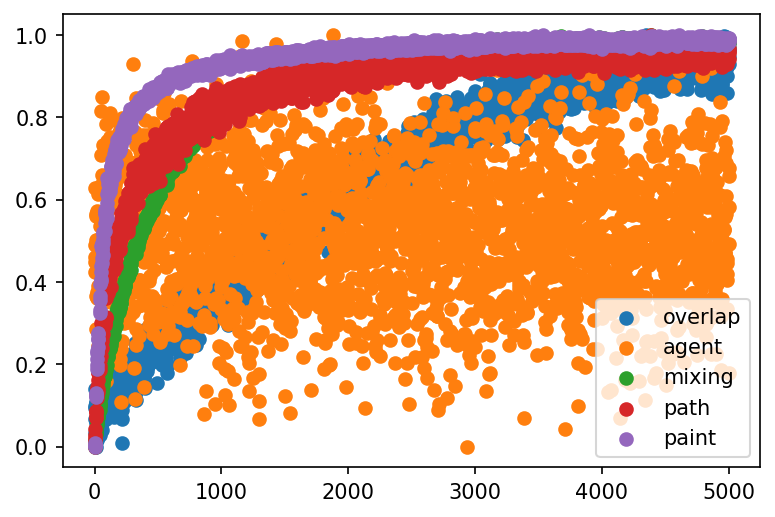

In [7]:
plt.figure(dpi=150)
for method_name, results in all_results.items():
    res = results-results.min()
    res = res/res.max()
    plt.scatter(all_inter_event, res, label=method_name)
plt.legend()
plt.show()

In [6]:
from scipy.stats import spearmanr
for method_name, results in all_results.items():
    print(method_name, spearmanr(all_inter_event, results))

overlap SpearmanrResult(correlation=0.9824883566049251, pvalue=0.0)
agent SpearmanrResult(correlation=-0.018705119655486848, pvalue=0.34937340635223524)
mixing SpearmanrResult(correlation=0.9585670148469968, pvalue=0.0)
path SpearmanrResult(correlation=0.9065641980552848, pvalue=0.0)
paint SpearmanrResult(correlation=0.9334500516428993, pvalue=0.0)
